# Task - 2 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Graduate Rotational Internship Program

# Author - Uttam Grade

# Spark Foundataion Task 2

In [15]:
# Imporing the libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.describe() # Describe the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
# Check the information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
# Checking is there any null values in our dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Figure size 432x288 with 0 Axes>

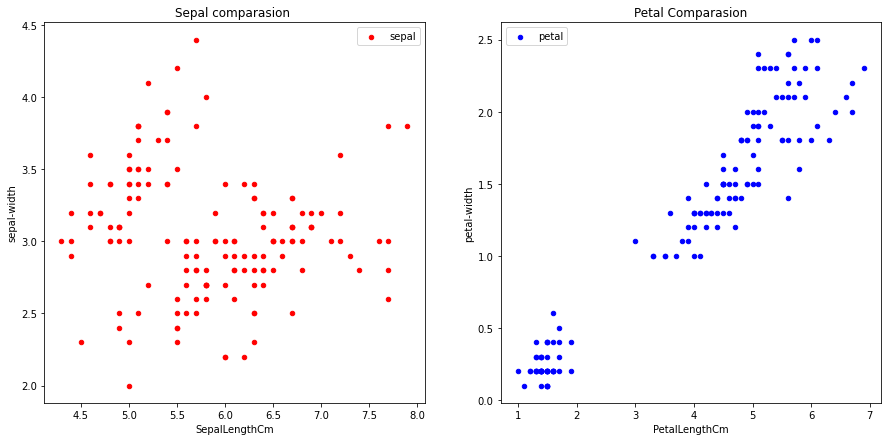

In [55]:
# Comparision between Sepal Length, Petal Length
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 7))
df.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
df.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

In [56]:
# using only SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm variable for easy visualisation
X = df.iloc[:, [1,2,3,4]].values

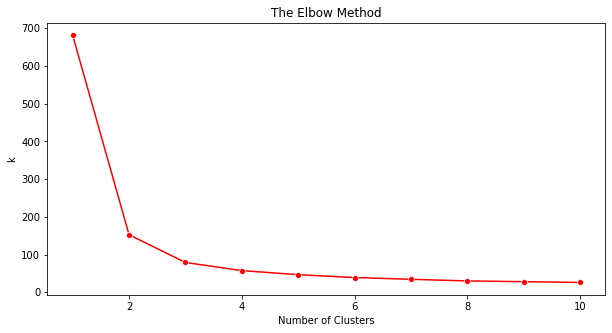

In [34]:
# Using the Elbow method find the Optimal number of cluster!
from sklearn.cluster import KMeans
import seaborn as sns
k = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i, max_iter =300, init = 'k-means++', random_state= 42)
    kmean.fit(X)
    k.append(kmean.inertia_)
plt.figure(figsize = (10,5))
sns.lineplot(range(1,11), k, marker = 'o', color = 'red')
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('k')
plt.show()

In [38]:
y_means = kmean.fit_predict(X)


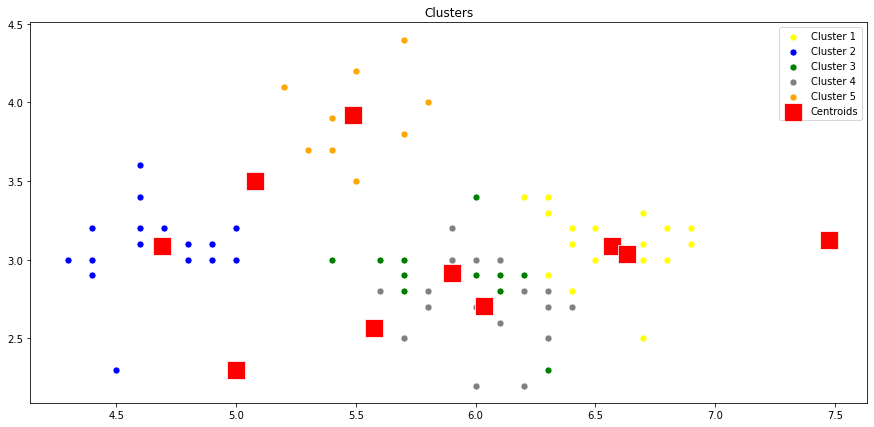

In [45]:
#Visualizing the Clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_means == 0, 0], X[y_means == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_means == 1, 0], X[y_means == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_means == 2, 0], X[y_means == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_means == 3, 0], X[y_means == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_means == 4, 0], X[y_means == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters')
plt.legend()
plt.show()


# Conclusion

K-means algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.


k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster